Jacob Solomon

Ryan Little

## Physics 260 - Final Project

# Optimizing the efficiency of a linear induction propulsion system



parameters to be investigated:

1. arrangement of loops
    a. radius
    b. spacing
    c. side-by-side?
2. current in loops
3. TBD
.
.
.


Optimizing: Strength of B-field, Uniformity of B-field, Energy required to 
    

### Import libraries


In [7]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
## The next line causes matplot lib it plot in the notebook, rather than poping up a window, for animations turn this off 
%matplotlib inline    
from mpl_toolkits.mplot3d import Axes3D   ## this is a special library to plot in 3d we are using today
import matplotlib as mpl
import matplotlib.cm as cm

### Function for calculating B-field due to a ring with current

In [8]:
def B_from_loop(R_loop,x_pos,y_pos,I,x,y,z):
    # z_loop is the height of the loop
    # I is the current of the loop
    # delta_theta is the step size of the theta array
    # x,y,z are the coordinates of the point you are calculating the magnetic field from
    ###################
    z_loop = 0
    delta_theta = 2*np.pi/100
    theta = np.arange(0,2*np.pi,delta_theta)
    x_loop = R_loop * np.cos(theta) + x_pos
    y_loop = R_loop * np.sin(theta) + y_pos
    
    ## differentiate x and y
    dl_x = - R_loop * delta_theta * np.sin(theta)
    dl_y = R_loop * delta_theta * np.cos(theta)
    
    ########### "loop to point" x separation for each x point
    Rx = np.zeros((np.size(theta),np.size(z)))
    
    n = 0 # n corresponds to the number of z points there are, for each one we make a separation array from all loop points
    while(n < np.size(z)):
        i = 0 # i corresponds to how many loop points there are, each nth column in the array will contain i number of elements
        while(i < np.size(theta)):
            Rx[i,n] = x[n] - x_loop[i]
            i = i + 1
        n = n + 1
        
    
    ########### "loop to point" y separation for each y point
    Ry = np.zeros((np.size(theta),np.size(z)))
    
    n = 0 # n corresponds to the number of z points there are, for each one we make a separation array from all loop points
    while(n < np.size(z)):
        i = 0 # i corresponds to how many loop points there are, each nth column in the array will contain i number of elements
        while(i < np.size(theta)):
            Ry[i,n] = y[n] - y_loop[i]
            i = i + 1
        n = n + 1
        
    ########### "loop to point" z separation for each z point
    Rz = np.zeros((np.size(theta),np.size(z)))
    
    n = 0 # n corresponds to the number of z points there are, for each one we make a separation array from all loop points
    while(n < np.size(z)):
        i = 0 # i corresponds to how many loop points there are, each nth column in the array will contain i number of elements
        while(i < np.size(theta)):
            Rz[i,n] = z[n] - z_loop
            i = i + 1
        n = n + 1
        
    ########### Rmag
    Rmag = np.zeros((np.size(theta),np.size(z)))
    Rmag = np.sqrt(Rx**2 + Ry**2 + Rz**2)
    
    ## calculate dl x r
    dlXr_x = np.zeros((np.size(theta),np.size(z)))
    dlXr_y = np.zeros((np.size(theta),np.size(z)))
    dlXr_z = np.zeros((np.size(theta),np.size(z)))
    
    n = 0
    while(n<np.size(z)):
        i = 0
        while(i < np.size(theta)):
            dlXr_x[i,n] = dl_y[i]*Rz[i,n]
            dlXr_y[i,n] = -dl_x[i]*Rz[i,n]
            dlXr_z[i,n] = dl_x[i]*Ry[i,n] - dl_y[i]*Rx[i,n]
            i = i + 1
        n = n + 1
            
    ## sum to get B (three components)
    Bx = np.zeros(np.size(z))
    By = np.zeros(np.size(z))
    Bz = np.zeros(np.size(z))
    i = 0
    
    while(i<np.size(z)):
        Bx[i] = (((1.2566e-6)*(I))/(4*np.pi))*np.sum((dlXr_x[:,i]/(Rmag[:,i]**3)))
        By[i] = (((1.2566e-6)*(I))/(4*np.pi))*np.sum((dlXr_y[:,i]/(Rmag[:,i]**3)))
        Bz[i] = (((1.2566e-6)*(I))/(4*np.pi))*np.sum((dlXr_z[:,i]/(Rmag[:,i]**3)))
        i = i + 1

    return(Bx,By,Bz)

#### First Iteration
Radius = 0.5m

Spacing = 1m (center to center)

Side to Side: No, single line

Current = 100A

In [39]:
R_loop = 0.5
I = 100
x_max = 10.01
y_max = 1.01
z_max = 1.01

x = np.arange(-x_max,x_max,0.5)
y = 0
z = np.arange(-z_max,z_max,0.3)

## make meshgrid arrays
x_array, z_array = np.meshgrid(x,z)

y_array = np.zeros((np.size(z),np.size(x)))

## initialize Bx, By, and Bz arrays
Bx = np.zeros((np.size(z),np.size(x)))
By = np.zeros((np.size(z),np.size(x)))
Bz = np.zeros((np.size(z),np.size(x)))

Bx_sum = np.zeros((np.size(z),np.size(x)))
By_sum = np.zeros((np.size(z),np.size(x)))
Bz_sum = np.zeros((np.size(z),np.size(x)))

i = 1
number_of_rings = 20
while(i < (number_of_rings + 1)):
    x_pos = -(x_max + 0.49) + i
    y_pos = 0
    print i, x_pos
    ## call B-field function for Helmholtz coils
    n = 0
    while(n<np.size(x)):
        Bx[:,n],By[:,n],Bz[:,n] = B_from_loop(R_loop, x_pos, y_pos, I, x_array[:,n],y_array[:,n],z_array[:,n])
        n =n+1    
        
    Bx_sum = Bx_sum + Bx
    By_sum = By_sum + By
    Bz_sum = Bz_sum + Bz
    
    i += 1
B_mag = np.sqrt(Bx_sum**2 + By_sum**2 + Bz_sum**2)

1 -9.5
2 -8.5
3 -7.5
4 -6.5
5 -5.5
6 -4.5
7 -3.5
8 -2.5
9 -1.5
10 -0.5
11 0.5
12 1.5
13 2.5
14 3.5
15 4.5
16 5.5
17 6.5
18 7.5
19 8.5
20 9.5


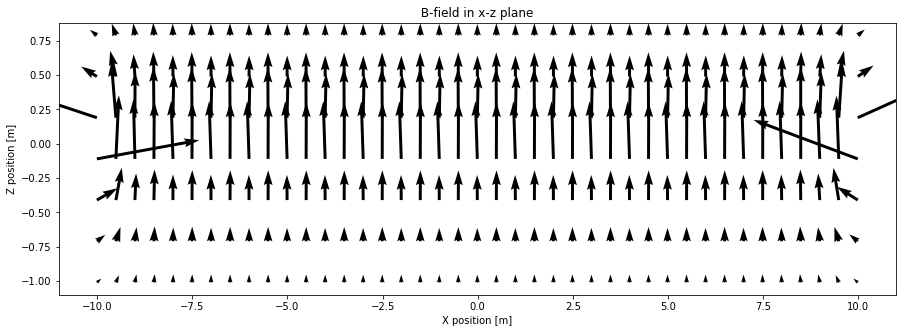

TypeError: Cannot cast array data from dtype('O') to dtype('int64') according to the rule 'safe'

In [49]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize

colormap = cm.coolwarm
norm_B = Normalize(np.sort(B_mag, axis=None))

plt.figure(figsize = (15,5))
qplot = plt.quiver(x_array,z_array,Bx_sum,Bz_sum,units = 'width')
plt.title(' B-field in x-z plane ')
plt.ylabel('Z position [m]')
plt.xlabel('X position [m]')
plt.show()


plt.figure(figsize = (15,5))
qplot = plt.quiver(x_array,z_array,Bx_sum/B_mag,Bz_sum/B_mag,color=colormap(norm_B), units = 'width')
plt.title('Normalized B-field in x-z plane')
plt.ylabel('Z position [m]')
plt.xlabel('X position [m]')
plt.show()